<a href="https://colab.research.google.com/github/Karthik-nova/Melanoma_CNN_Prediction/blob/main/Melanoma_CNN_Assignment_June23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New section

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

Importing Skin Cancer Data

Importing all the important libraries

In [11]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
# Defining the path for train and test images

data_dir_train = pathlib.Path('/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/gdrive/My Drive/Melanoma_studygroup_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [17]:
#Retrieve number of images present in train dataset and test dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility

**Create a dataset**

Define some parameters for the loader:

In [18]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [19]:
## train dataset
## Using seed=123
## resize images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [20]:
## Validation dataset here
## Using seed=123
## resize images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [21]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

Visualize one instance of all the nine classes present in the dataset

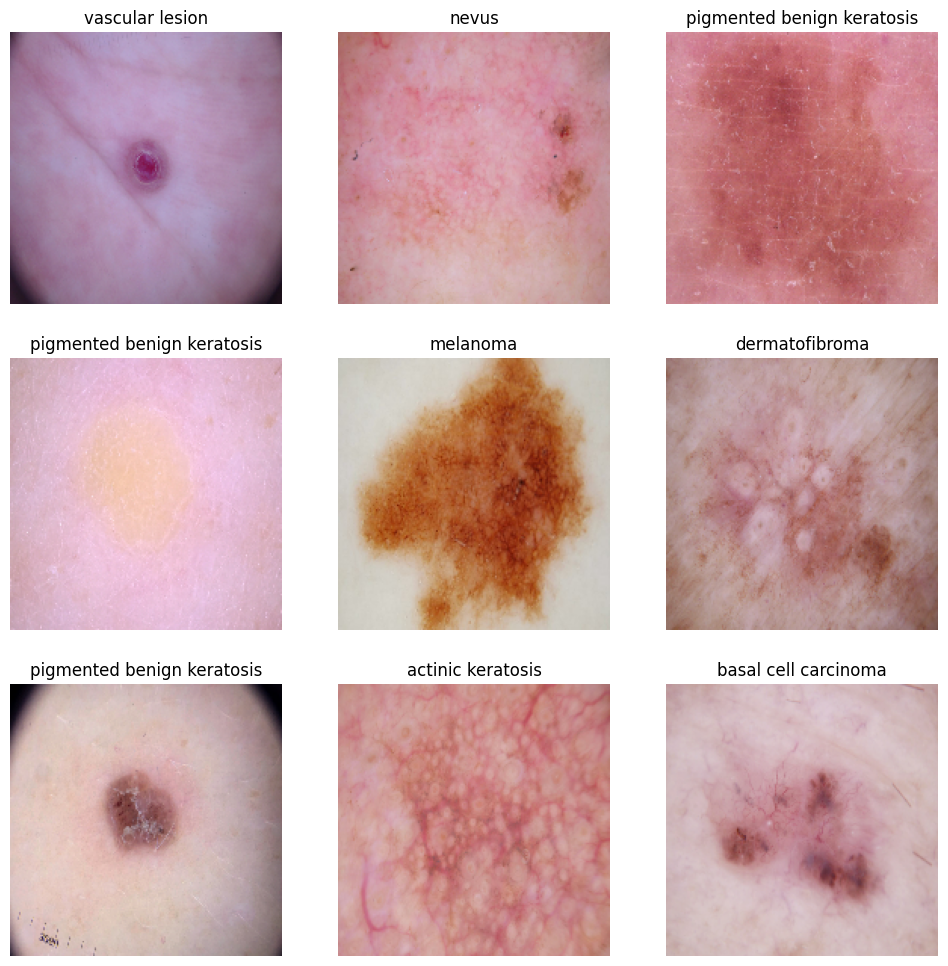

In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.imshow(images[i].numpy().astype("uint8"))


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

### Model 1
#### Create a CNN model, which can accurately detect 9 classes present in the dataset.

In [24]:
tot_classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(tot_classes)
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [25]:
### Choose an appropriate optimiser and loss function
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
# View the summary of all layers
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

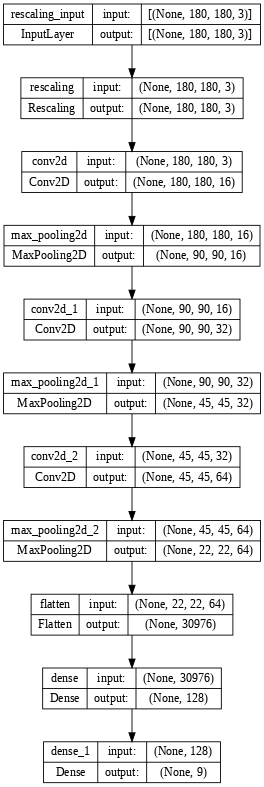

In [27]:
tf.keras.utils.plot_model(model1, show_shapes=True, dpi=64)

### Train the model

In [28]:
epochs = 20

history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 685s 4s/step - loss: 2.0915 - accuracy: 0.2690 - val_loss: 1.7467 - val_accuracy: 0.3490
Epoch 2/20
56/56 [==============================] - 76s 1s/step - loss: 1.6505 - accuracy: 0.4196 - val_loss: 1.6530 - val_accuracy: 0.4206
Epoch 3/20
56/56 [==============================] - 72s 1s/step - loss: 1.4757 - accuracy: 0.4927 - val_loss: 1.5928 - val_accuracy: 0.4251
Epoch 4/20
56/56 [==============================] - 72s 1s/step - loss: 1.4196 - accuracy: 0.5006 - val_loss: 1.4130 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 73s 1s/step - loss: 1.3156 - accuracy: 0.5402 - val_loss: 1.4596 - val_accuracy: 0.5011
Epoch 6/20
56/56 [==============================] - 72s 1s/step - loss: 1.2529 - accuracy: 0.5458 - val_loss: 1.4717 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 77s 1s/step - loss: 1.2294 - accuracy: 0.5569 - val_loss: 1.4499 - val_accuracy: 0.5123
Epoch 8/20
56/56 [=

Visualizing the results

In [31]:
## Define function to visualize results
def results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()


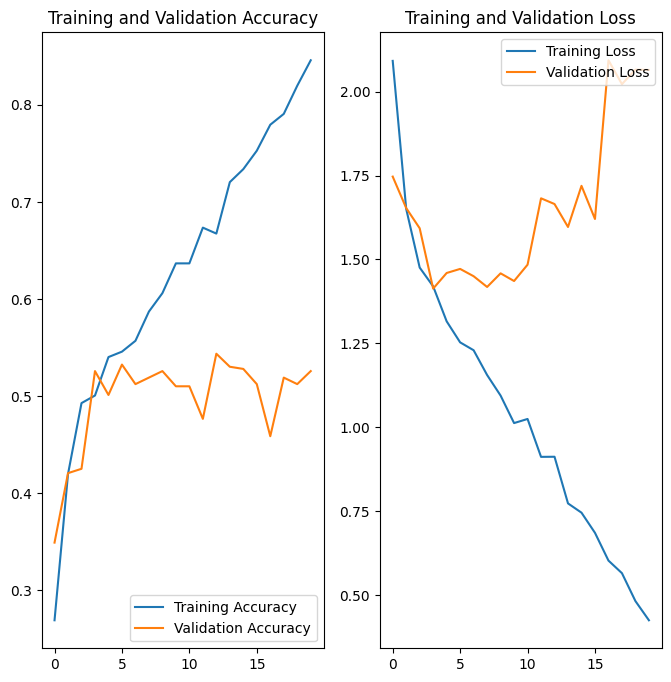

In [32]:
results(history)

### **Findings from Model1**
From the graph we can see training accuracy is very high as compared to validation accuracy. We can also see difference in loss functions in training and validation data around 19th and 20th epochs. This is a clear case of overfitting where model has learned too much from training dataset and it is not able to perform well on the validation dataset.
  - **Training Accuracy:** 84.60
  - **Validation Accuracy:** 52.57

In [33]:
# Choose an appropriate data augumentation strategy.

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

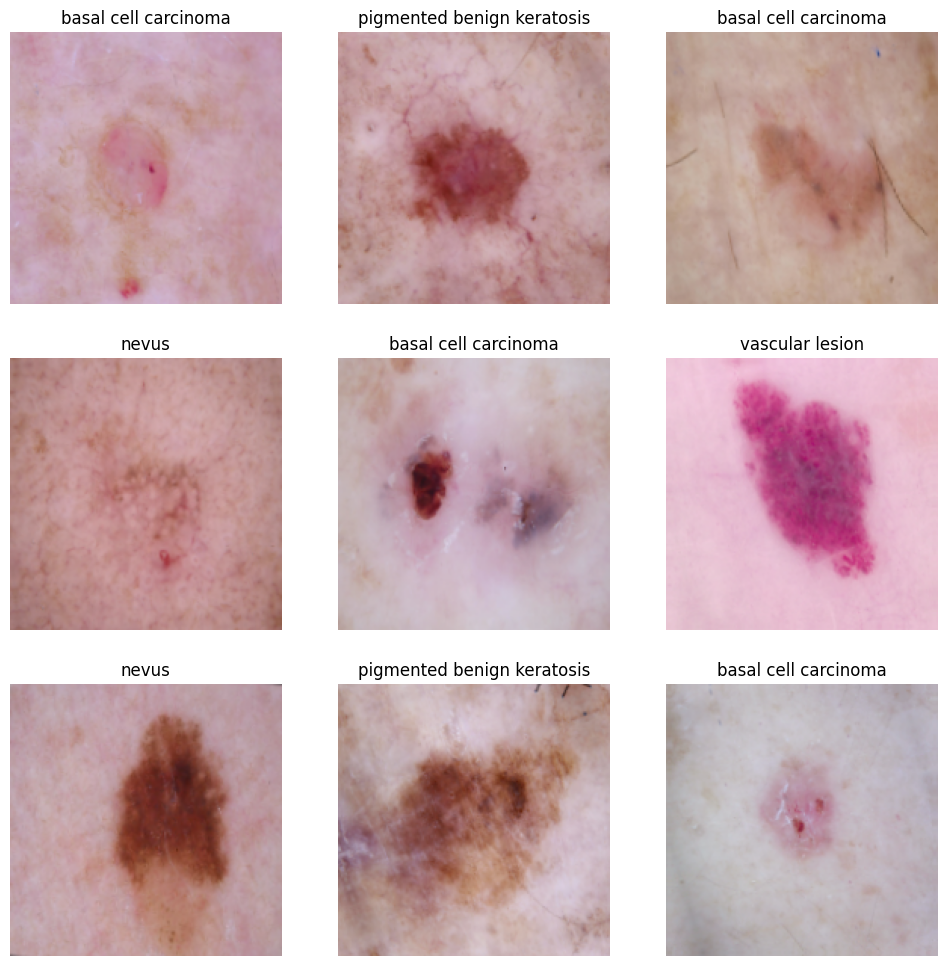

In [34]:
# Visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



### Create the model, compile and train the model
### Model 2

In [35]:
## We can use Dropout layer as there is an evidence of overfitting in our findings

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(tot_classes)
])

### Compiling the model

In [36]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [37]:
epochs = 20

history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 [==============================] - 82s 1s/step - loss: 2.0040 - accuracy: 0.2578 - val_loss: 1.9003 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 80s 1s/step - loss: 1.7008 - accuracy: 0.3817 - val_loss: 1.6404 - val_accuracy: 0.4295
Epoch 3/20
56/56 [==============================] - 84s 2s/step - loss: 1.6119 - accuracy: 0.4102 - val_loss: 1.5625 - val_accuracy: 0.4385
Epoch 4/20
56/56 [==============================] - 80s 1s/step - loss: 1.4854 - accuracy: 0.4805 - val_loss: 1.4487 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 81s 1s/step - loss: 1.4124 - accuracy: 0.5045 - val_loss: 1.4338 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 86s 2s/step - loss: 1.3190 - accuracy: 0.5223 - val_loss: 1.3775 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 84s 2s/step - loss: 1.3144 - accuracy: 0.5346 - val_loss: 1.3486 - val_accuracy: 0.5347
Epoch 8/20
56/56 [==